<a href="https://colab.research.google.com/github/dikshakalambe25/LP2/blob/main/analytics2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

from google.colab import files
uploaded = files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads (3).csv


In [24]:
df=pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [25]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [26]:
df.columns = df.columns.str.strip()
print(df.columns)

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')


In [27]:
# Feature matrix and target variable
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

In [28]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [29]:
# Feature scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [30]:
# Build and train the model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [31]:
# Predict on test data
y_pred = model.predict(x_test)

In [32]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

In [33]:
# Metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)
error_rate = (fp + fn) / (tp + tn + fp + fn)
precision = tp / (tp  + fp)
recall = tp / (tp + fn)

In [34]:
# Display results
print("Confusion Matrix:")
print(cm)
print(f"\nTrue Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")
print(f"\nAccuracy: {accuracy:.4f}")
print(f"Error Rate: {error_rate:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Confusion Matrix:
[[65  3]
 [ 8 24]]

True Negatives (TN): 65
False Positives (FP): 3
False Negatives (FN): 8
True Positives (TP): 24

Accuracy: 0.8900
Error Rate: 0.1100
Precision: 0.8889
Recall: 0.7500
F1 Score: 0.6702


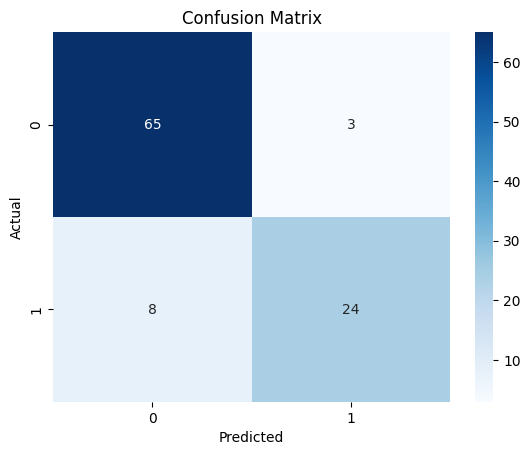

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap for confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

